# PyTASER Examples


The examples given below use electronic structure information from the Materials Project database. They require an API key that you can get from https://materialsproject.org/open



As the database is built from density functional theory calculations using a semi-local exchange-correlation functional, the band gaps are underestimated, so we apply a scissors operator to recover the experimental bandgap in each case. This is necessary to directly compared predicted and modelled spectra.

## Setup

In [4]:
from pytaser import generator, plotter

%pylab inline

key = ""  # insert your own Materias Project key

Populating the interactive namespace from numpy and matplotlib


## GaAs

Connection established to Materials Project database, version 2020_09_08.


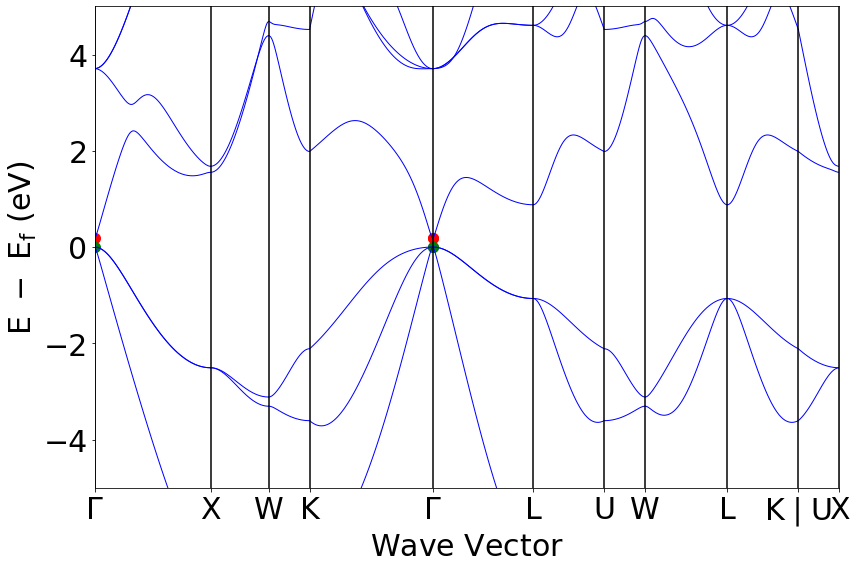

In [5]:
# Band structure read from pymatgen
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter

api = MPRester(key)
bs = api.get_bandstructure_by_material_id("mp-2534")

from pymatgen.electronic_structure.plotter import BSPlotter

plt = BSPlotter(bs).get_plot(vbm_cbm_marker=True, ylim=[-5, +5])

Connection established to Materials Project database, version 2020_09_08.


/opt/anaconda3/lib/python3.8/site-packages/pymatgen-2020.9.14-py3.8-macosx-10.9-x86_64.egg/pymatgen/electronic_structure/dos.py:1009: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp((E - fermi) / (_cd("Boltzmann constant in eV/K") * T)))
/opt/anaconda3/lib/python3.8/site-packages/pytaser/plotter.py:8: RuntimeWarning: divide by zero encountered in true_divide
  wavelength = ((scpc.h * scpc.c) / (ev * scpc.electron_volt)) * 10e8


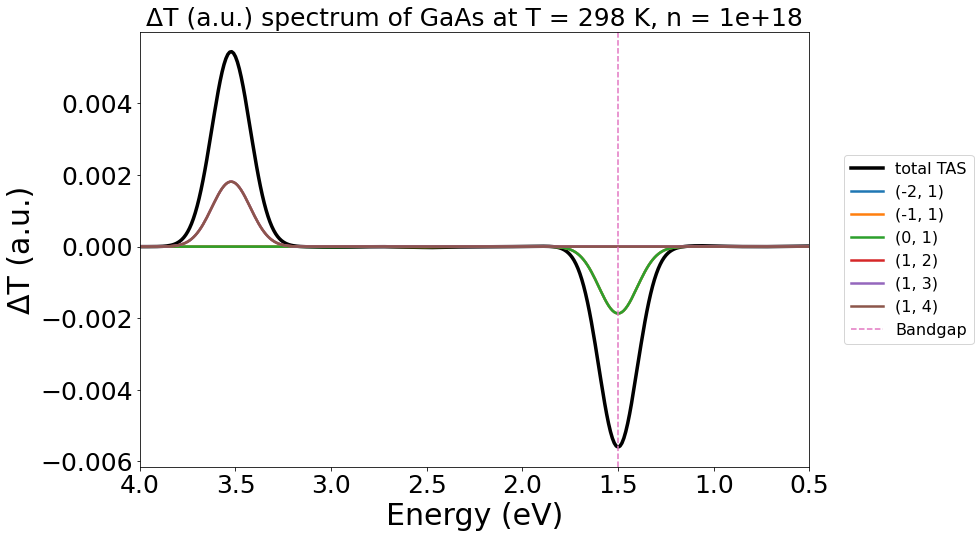

In [6]:
# Setting values
temp = 298  # temperature in Kelvin
conc = 1e18  # carrier concentration per cm3
bandgap = 1.5  # eV, standard value at T = 300 K

# Run pyTASER
data = generator.TASGenerator.from_mpid("mp-2534", bandgap, api_key=key)
process = data.generate_tas(temp, conc)
plot = plotter.TASPlotter(
    process, bandgap, material_name="GaAs", temp=temp, conc=conc
)

# Output energy plot
energyplot = plot.get_plot(
    xaxis="energy", transition_cutoff=0.03, xmin=0.5, xmax=4, yaxis="tas"
)
# Reverse axis for better comparison tp experiment
energyplot.gca().invert_xaxis()

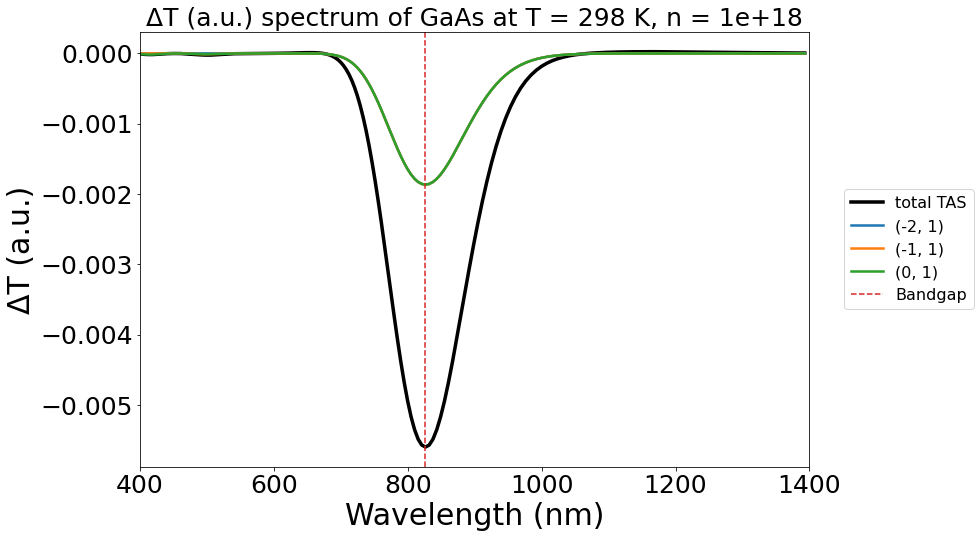

In [7]:
# Output wavelength plot
wavelengthplot = plot.get_plot(
    xaxis="wavelength",
    transition_cutoff=0.03,
    xmin=400,
    xmax=1400,
    yaxis="tas",
)